# Linear regression and stochastic gradient descent

The task is based on the materials of lectures on linear regression and gradient descent. You will forecast the company's revenue depending on the level of its investment in advertising on TV, in newspapers and on the radio.

## You will learn:
- solve the problem of linear regression recovery
- implement stochastic gradient descent to adjust it
- solve the linear regression problem analytically

## Introduction
Linear regression is one of the most well-studied methods of machine learning, which allows predicting the values of a quantitative feature in the form of a linear combination of other features with model parameters - weights. Optimal (in the sense of minimality of some error functional) parameters of linear regression can be found analytically using a normal equation or numerically using optimization methods.

Linear regression uses a simple quality functional - the root-mean-square error. We will work with a sample containing 3 attributes. To adjust the parameters (weights) of the model, the following problem is solved:
$$\Large\frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1 x_{i 1} + w_2 x_{i 2} + w_3 x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
where $x_{i1}, x_{i2}, x_{i3}$ are the values of the features of the $i$th object, $y_i$ is the value of the target feature of the $i$th object, $\ell$ is the number of objects in the training sample.

## Gradient descent
The parameters $w_0, w_1, w_2, w_3$, by which the root-mean-square error is minimized, can be found numerically using gradient descent.
The gradient step for the weights will look like this:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Here $\eta$ is a parameter, a step of gradient descent.

## Stochastic gradient descent
The problem with gradient descent described above is that for large samples, it can be very computationally difficult to calculate the gradient from all available data at each step. 
In the stochastic version of gradient descent, corrections for weights are calculated only taking into account one randomly taken object of the training sample:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
where $k$ is a random index, $k \in \{1, \ldots, \ell\}$.

## Normal equation 
Finding the vector of optimal weights $w$ can also be done analytically.
We want to find such a vector of weights $w$ so that the vector $y$ approximating the target feature is obtained by multiplying the matrix $X$ (consisting of all the features of the objects of the training sample, except the target) by the vector of weights $w$. That is, so that the matrix equation is fulfilled:
$$\Large y = Xw$$
Multiplying on the left by $X^T$ we get:
$$\Large X^Ty = X^TXw$$
This is good, because now the matrix $X^TX$ is square, and you can find a solution (vector $w$) in the form:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Matrix ${(X^TX)}^{-1}X^T$ - [*pseudo-inverse*](https://ru.wikipedia.org/wiki/Pseudo-inverse matrix) for the matrix $X$. In NumPy , such a matrix can be calculated using the functions [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

However, finding a pseudo-inverse matrix is a computationally complex and unstable operation in the case of a small determinant of the matrix $X$ (multicollinearity problem). 
In practice, it is better to find the vector of weights $w$ by solving the matrix equation
$$\Large X^TXw = X^Ty$$ 
This can be done using the function [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

But still, in practice, gradient descent works faster for large $X$ matrices, especially its stochastic version.

## Execution Instructions

**1. Upload the data from the *advertising.csv* file to the pandas DataFrame object. [Data Source](http://www-bcf.usc.edu /~gareth/ISL/data.html ).**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

adver_data = pd.read_csv('advertising.csv')

**Look at the first 5 records and at the feature statistics in this dataset.**

In [14]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Create NumPy arrays *X* from the TV, Radio and Newspaper columns and *y* - from the Sales column. Use the *value* attribute of the pandas DataFrame object.**

In [19]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data['Sales'].values

In [20]:
print(X)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

**Scale the columns of the matrix *X* by subtracting the average of the corresponding column from each value and dividing the result by the standard deviation. For certainty, use the mean and std methods of NumPy vectors (the implementation of std in Pandas may differ). Note that in numpy, calling the .main() function without parameters returns the average for all elements of the array, and not for columns, as in pandas. To calculate by columns, you must specify the axis parameter.**

In [21]:
means, stds = np.mean(X, axis=0), np.std(X, axis=0)

In [25]:
print(means,stds)

[147.0425  23.264   30.554 ] [85.63933176 14.80964564 21.72410606]


In [22]:
X = (X - means)/stds 

**Add a column of units to the matrix *X* using the *stack*, *one s* and *reshape* methods of the NumPy library. The vector of units is needed in order not to process the coefficient $w_0$ of linear regression separately.**

In [23]:
X.shape

(200, 3)

In [24]:
X = np.hstack((np.ones((X.shape[0],1)),X)) 

**2. Implement the *ms error* function - the root-mean-square error of the forecast. It takes two arguments - objects Series *y* (values of the target attribute) and *y\_pred* (predicted values). Don't use loops in this function - then it will be computationally inefficient.**

In [26]:
def mserror(y, y_pred):
    return np.mean((y - y_pred)**2)

**What is the root-mean-square error of forecasting Sales values if we always predict the median value of Sales from the original sample? The resulting result, rounded to 3 decimal places, is the answer to *'1 task'.***

In [27]:
answer1 = mserror(y, np.median(y) * np.ones((len(y), 1)))
print(round(answer1, 3))

28.346


**3. Implement the *normal_equation* function, which calculates the weight vector $w$ according to the normal linear regression equation using the given matrices (NumPy arrays) *X* and *y*.**

In [28]:
np.shape(X)

(200, 4)

In [29]:
X

array([[ 1.00000000e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [ 1.00000000e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [ 1.00000000e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [ 1.00000000e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [ 1.00000000e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [ 1.00000000e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [ 1.00000000e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [ 1.00000000e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [ 1.00000000e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [ 1.00000000e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [ 1.00000000e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [ 1.00000000e+00,  7.90028350e-01,  4.96973404e-02,
      

In [30]:
def normal_equation(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [31]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


In [30]:
np.shape(norm_eq_weights)

(4,)

In [31]:
means

array([147.0425,  23.264 ,  30.554 ])

**What sales are predicted by a linear model with weights found using a normal equation in the case of average investments in advertising on TV, radio and in newspapers? (that is, with zero values of scaled features of TV, Radio and Newspaper). The resulting result, rounded to 3 decimal places, is the answer to *'2 task'*.**

In [32]:
answer2 = np.dot(np.array([1, 0, 0, 0]), norm_eq_weights)
print(round(answer2, 3))

14.022


**4. Write a function *linear_prediction*, which takes as input a matrix *X* and a vector of weights of a linear model *w*, and returns a vector of forecasts in the form of a linear combination of columns of the matrix *X* with weights *w*.**

In [33]:
def linear_prediction(X, w):
    return (np.dot(X,w))

**What is the root-mean-square error of forecasting Sales values in the form of a linear model with weights found using a normal equation?
The resulting result, rounded to 3 decimal places, is the answer to *'3 task'***

In [35]:
answer3 = mserror(linear_prediction(X,norm_eq_weights), y)
print(round(answer3, 3))

2.784


**5. Write a function *stochastic_gradient_step* that implements a step of stochastic gradient descent for linear regression. The function must take a matrix *X*, vectors *y* and *w*, the number *train_ind* - the index of the training sample object (rows of the matrix *X*), according to which the change in weights is calculated, as well as the number *$\eta$* (eta) - the step of gradient descent (by default *eta*=0.01). The result will be a vector of updated weights. Our implementation of the function will be explicitly written for data with 3 attributes, but it is not difficult to modify for any number of attributes, you can do it.**

In [36]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = np.sum(X[train_ind, :] * w - y[train_ind]) / len(y)
    grad1 = X[train_ind, 1] * np.sum(X[train_ind, :] * w - y[train_ind]) / len(y)
    grad2 = X[train_ind, 2] * np.sum(X[train_ind, :] * w - y[train_ind]) / len(y)
    grad3 = X[train_ind, 3] * np.sum(X[train_ind, :] * w - y[train_ind]) / len(y)
    return  w - 2 * eta * np.array([grad0, grad1, grad2, grad3])

In [38]:
len(X)

200

**6. Write a function *stochastic_gradient_descent* that implements stochastic gradient descent for linear regression. The function takes the following arguments as input:**
- X is the matrix corresponding to the training sample
- y is the vector of values of the target attribute
- w_init - vector of initial weights of the model
- eta - gradient descent step (0.01 by default)
- max_iter - maximum number of gradient descent iterations (10000 by default)
- min_weight_dist - maximum Euclidean distance between weight vectors on adjacent iterations of gradient descent,
at which the algorithm stops working (by default 1e-8)
- seed - the number used for reproducibility of generated pseudo-random numbers (42 by default)
- verbose - the flag for printing information (for example, for debugging, False by default)

**At each iteration, the current value of the root-mean-square error should be written to the vector (list). The function should return a vector of weights $w$, as well as a vector (list) of errors.**

In [48]:
def stochastic_gradient_descent(X, y, w_init, seed=42, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, verbose=False):
    # Initialize the distance between the vectors of weights on neighboring
    # iterations with a large number.
    weight_dist = np.inf
    # Initialize the vector of weights
    w = w_init
    # Here we will record errors on each iteration
    errors = []
    # Iteration counter
    iter_num = 0
    # We will generate pseudo-random numbers 
    # (the number of the object that will change weights), and for reproducibility
    # for this sequence of pseudorandom numbers, we use seed.
    np.random.seed(seed)
        
    # Main cycle
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # generating a pseudorandom 
        # index of the training sample object
        random_ind = np.random.randint(X.shape[0])
        
        # Your code is here
        w_tmp = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta)
        errors.append(mserror(y, linear_prediction(X, w)))
        
        weight_dist = np.linalg.norm(w_tmp - w, 2)
        iter_num += 1
        
    return w, errors

**Run $10^5$ iterations of stochastic gradient descent. Specify the vector of initial weights *w_init*, consisting of zeros. Leave the *eta* and *seed* parameters equal to their default values (*beta*=0.01, *seed*=42 - this is important for checking answers).**

In [49]:
%%time
w_init = np.zeros(4)
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0,0,0,0]), eta=0.01, max_iter=1e5)

CPU times: user 5.93 s, sys: 75.3 ms, total: 6.01 s
Wall time: 6.01 s


**Let's see what the error is at the first 50 iterations of stochastic gradient descent. We see that the error does not necessarily decrease at each iteration.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

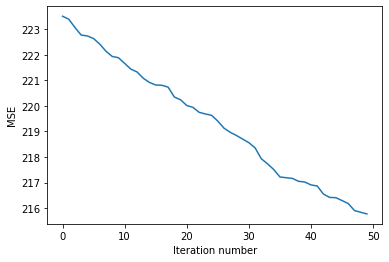

In [50]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Now let's look at the dependence of the error on the iteration number for $10^5$ iterations of stochastic gradient descent. We see that the algorithm converges.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

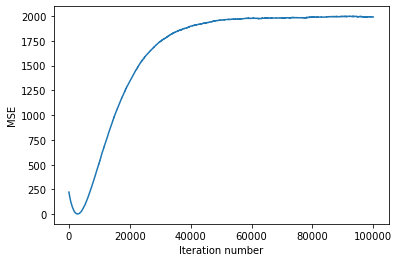

In [51]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')